<a href="https://colab.research.google.com/github/AKP-shadow/AKP-shadow/blob/main/mediapipe_hands.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Usage example of MediaPipe Hands Solution API in Python (see also http://solutions.mediapipe.dev/hands).

In [1]:
!pip install mediapipe

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.0/33.0 MB 31.3 MB/s eta 0:00:00


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Upload any image that contains hand(s) to the Colab. We took two examples from the web: https://unsplash.com/photos/QyCH5jwrD_A and https://unsplash.com/photos/mt2fyrdXxzk


In [2]:
from google.colab import files

uploaded = files.upload()

Saving fist.jpg to fist.jpg


In [75]:
import cv2
from google.colab.patches import cv2_imshow
import math
import numpy as np
import os
path = "/content/drive/MyDrive/Dataset/asl_dataset"
DESIRED_HEIGHT = 480
DESIRED_WIDTH = 480
def resize_and_show(image):
  h, w = image.shape[:2]
  if h < w:
    img = cv2.resize(image, (DESIRED_WIDTH, math.floor(h/(w/DESIRED_WIDTH))))
  else:
    img = cv2.resize(image, (math.floor(w/(h/DESIRED_HEIGHT)), DESIRED_HEIGHT))
  cv2_imshow(img)

# Read images with OpenCV.
# print(os.listdir(path+"/0")[:2])
# print(cv2.imread("hand2_0_left_seg_4_cropped.jpeg"))
images = {name: cv2.imread(path+"/0/"+name) for name in os.listdir(path+"/0")[:5]}

# print(images)
# Preview the images.
# for letter in os.listdir(path):
#   for img in os.listdir(path+"/"+letter):

# for name, image in images.items():
#   print(name)   
#   resize_and_show(image)

All MediaPipe Solutions Python API examples are under mp.solutions.

For the MediaPipe Hands solution, we can access this module as `mp_hands = mp.solutions.hands`.

You may change the parameters, such as `static_image_mode`, `max_num_hands`, and `min_detection_confidence`, during the initialization. Run `help(mp_hands.Hands)` to get more informations about the parameters.

In [80]:
import mediapipe as mp
import pandas as pd
mp_hands = mp.solutions.hands
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles
nodes=[]
for node in mp_hands.HandLandmark:
  nodes+=[str(node).split('.')[1]+"_X",str(node).split('.')[1]+"_Y",str(node).split('.')[1]+"_Z"]
train_set = pd.DataFrame(columns =  ['letter'] + nodes)
# help(mp_hands.Hands)

Handedness of hand2_0_left_seg_4_cropped.jpeg:
None
Handedness of hand2_0_left_seg_3_cropped.jpeg:
None
Handedness of hand2_0_dif_seg_5_cropped.jpeg:
[classification {
  index: 1
  score: 0.9963854551315308
  label: "Right"
}
]
Hand landmarks of hand2_0_dif_seg_5_cropped.jpeg:
Index finger tip coordinate: ( 113.01225423812866, 87.67563104629517)


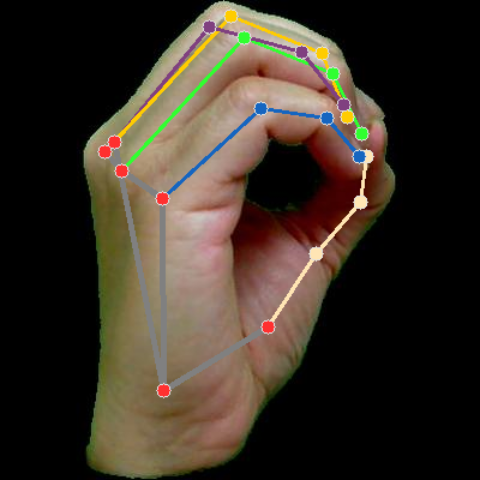

Handedness of hand2_0_left_seg_1_cropped.jpeg:
[classification {
  index: 1
  score: 0.9931496977806091
  label: "Right"
}
]
Hand landmarks of hand2_0_left_seg_1_cropped.jpeg:
Index finger tip coordinate: ( 93.16614866256714, 77.06195116043091)


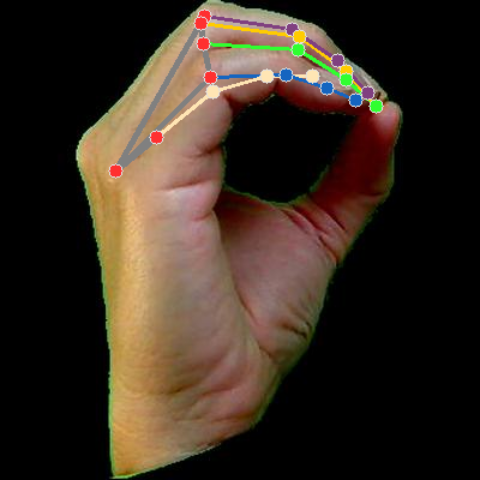

Handedness of hand2_0_left_seg_2_cropped.jpeg:
[classification {
  index: 1
  score: 0.9949641227722168
  label: "Right"
}
]
Hand landmarks of hand2_0_left_seg_2_cropped.jpeg:
Index finger tip coordinate: ( 97.35665321350098, 71.25231623649597)


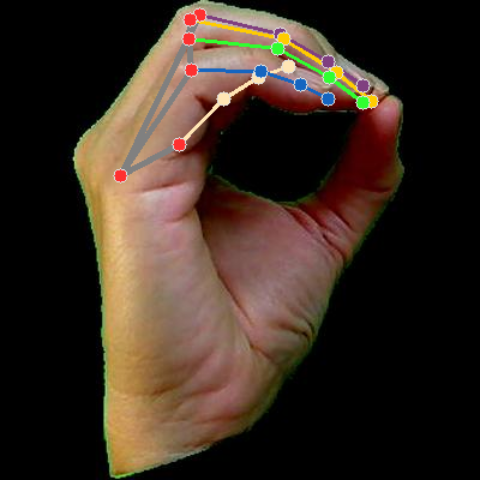

In [81]:
# Run MediaPipe Hands.
with mp_hands.Hands(
    static_image_mode=True,
    max_num_hands=2,
    min_detection_confidence=0.7) as hands:
  for name, image in images.items():
    # Convert the BGR image to RGB, flip the image around y-axis for correct 
    # handedness output and process it with MediaPipe Hands.
    results = hands.process(cv2.flip(cv2.cvtColor(image, cv2.COLOR_BGR2RGB), 1))

    # Print handedness (left v.s. right hand).
    print(f'Handedness of {name}:')
    print(results.multi_handedness)

    if not results.multi_hand_landmarks:
      continue
    # Draw hand landmarks of each hand.
    print(f'Hand landmarks of {name}:')
    image_hight, image_width, _ = image.shape
    annotated_image = cv2.flip(image.copy(), 1)
    c=0
    for hand_landmarks in results.multi_hand_landmarks:
      c+=1
      # Print index finger tip coordinates.
      print(
          f'Index finger tip coordinate: (',
          f'{hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_TIP].x * image_width}, '
          f'{hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_TIP].y * image_hight})'
      )
      
      mp_drawing.draw_landmarks(
          annotated_image,
          hand_landmarks,
          mp_hands.HAND_CONNECTIONS,
          mp_drawing_styles.get_default_hand_landmarks_style(),
          mp_drawing_styles.get_default_hand_connections_style())
    resize_and_show(cv2.flip(annotated_image, 1))

In [83]:

for hand_landmarks in results.multi_hand_landmarks:
  locations = {}
  locations['letter'] = "0"
  for pos in mp_hands.HandLandmark:
    locations[str(pos).split('.')[1]+"_X"] = hand_landmarks.landmark[pos].x
    locations[str(pos).split('.')[1]+"_Y"] = hand_landmarks.landmark[pos].y
    locations[str(pos).split('.')[1]+"_Z"] = hand_landmarks.landmark[pos].z

  print(locations)
 
  train_set.append(locations,ignore_index=True) 

 
print(train_set)

{'letter': '0', 'WRIST_X': 0.7488095164299011, 'WRIST_Y': 0.36717820167541504, 'WRIST_Z': -1.5630273537681205e-06, 'THUMB_CMC_X': 0.6262291073799133, 'THUMB_CMC_Y': 0.3016669750213623, 'THUMB_CMC_Z': 0.029927745461463928, 'THUMB_MCP_X': 0.5331830382347107, 'THUMB_MCP_Y': 0.2059846818447113, 'THUMB_MCP_Z': 0.0339575856924057, 'THUMB_IP_X': 0.46128028631210327, 'THUMB_IP_Y': 0.16149583458900452, 'THUMB_IP_Z': 0.02505418285727501, 'THUMB_TIP_X': 0.39777952432632446, 'THUMB_TIP_Y': 0.13785268366336823, 'THUMB_TIP_Z': 0.010311576537787914, 'INDEX_FINGER_MCP_X': 0.584250807762146, 'INDEX_FINGER_MCP_Y': 0.030892614275217056, 'INDEX_FINGER_MCP_Z': 0.03313017636537552, 'INDEX_FINGER_PIP_X': 0.4154554605484009, 'INDEX_FINGER_PIP_Y': 0.07110711932182312, 'INDEX_FINGER_PIP_Z': -0.00791009422391653, 'INDEX_FINGER_DIP_X': 0.3155146837234497, 'INDEX_FINGER_DIP_Y': 0.12764468789100647, 'INDEX_FINGER_DIP_Z': -0.05175169184803963, 'INDEX_FINGER_TIP_X': 0.24339163303375244, 'INDEX_FINGER_TIP_Y': 0.178130

Mounted at /content/drive


Hand world landmarks of brooke-cagle-mt2fyrdXxzk-unsplash.jpg:


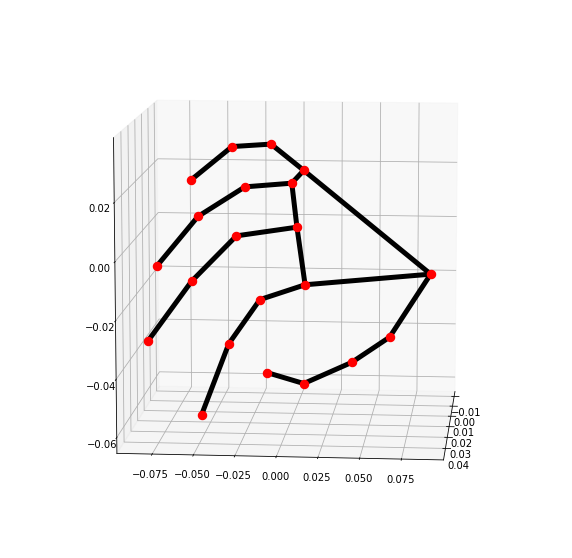

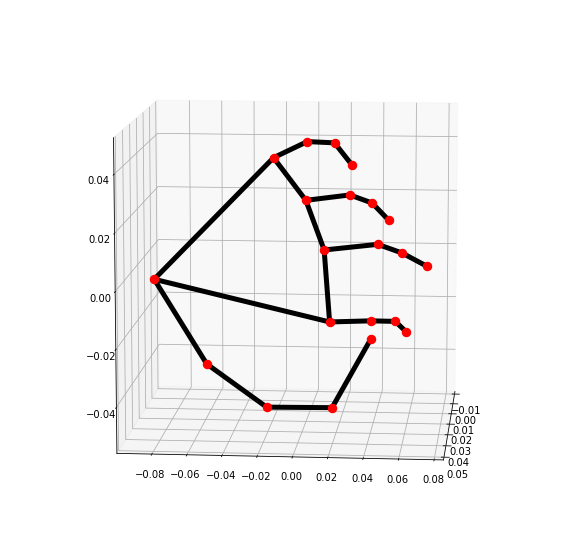

Hand world landmarks of kira-auf-der-heide-QyCH5jwrD_A-unsplash.jpg:


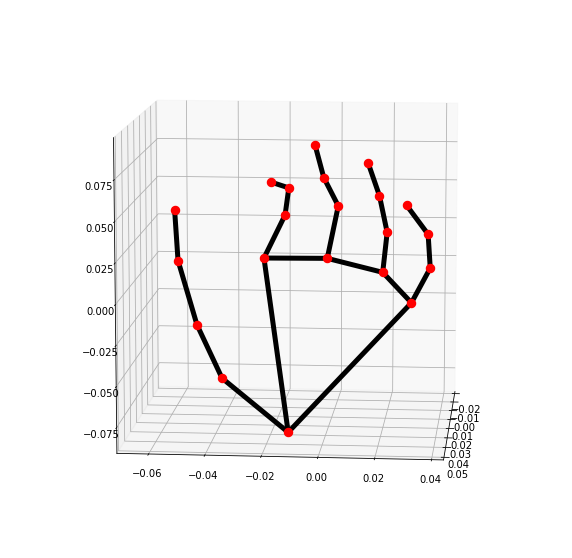

In [ ]:
# Run MediaPipe Hands and plot 3d hands world landmarks.
with mp_hands.Hands(
    static_image_mode=True,
    max_num_hands=2,
    min_detection_confidence=0.7) as hands:
  for name, image in images.items():
    # Convert the BGR image to RGB and process it with MediaPipe Hands.
    results = hands.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    # Draw hand world landmarks.
    print(f'Hand world landmarks of {name}:')
    if not results.multi_hand_world_landmarks:
      continue
    for hand_world_landmarks in results.multi_hand_world_landmarks:
      mp_drawing.plot_landmarks(
        hand_world_landmarks, mp_hands.HAND_CONNECTIONS, azimuth=5)